### Imports

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

### Dataset and old model preparation

In [ ]:
df = pd.read_csv("fraud_score_dataset.csv")
class_labels = {
    0: "Clear",
    1: "Fraudster"
}

old_model = xgb.XGBClassifier()
old_model.load_model("model_docker.json")

In [ ]:
X = df[old_model.feature_names_in_.tolist()]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

### Old model evaluation

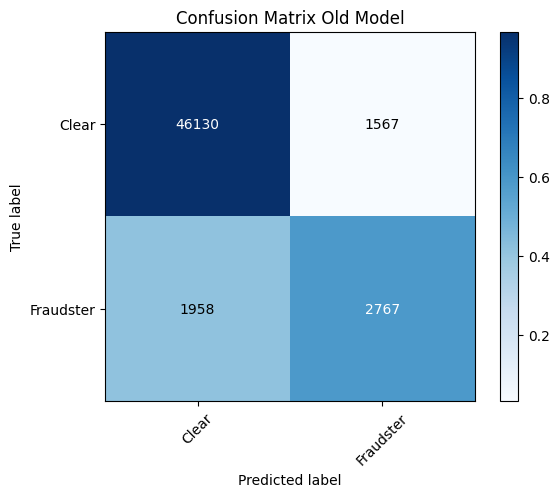

F1 score: 0.6108842035544763


In [33]:
y_pred = old_model.predict(X_test)

y_test_labels = [class_labels[x] for x in y_test]
y_pred_labels = [class_labels[x] for x in y_pred]

# Compute confusion matrices
cm_counts = confusion_matrix(y_test_labels, y_pred_labels, labels=list(class_labels.values()))
cm_normalized = confusion_matrix(y_test_labels, y_pred_labels, labels=list(class_labels.values()), normalize='true')

# Plot with normalized colors but show counts
fig, ax = plt.subplots()
im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

# Add raw counts as text, with color based on background
thresh = cm_normalized.max() / 2.
for i in range(cm_counts.shape[0]):
    for j in range(cm_counts.shape[1]):
        color = "white" if cm_normalized[i, j] > thresh else "black"
        ax.text(j, i, cm_counts[i, j], ha="center", va="center", color=color)

ax.set_xticks(range(2))
ax.set_yticks(range(2))
ax.set_xticklabels(list(class_labels.values()), rotation=45)
ax.set_yticklabels(list(class_labels.values()))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix Old Model")
plt.colorbar(im)
plt.show()

test_f1 = f1_score(y_test, y_pred)
print("F1 score:", test_f1)

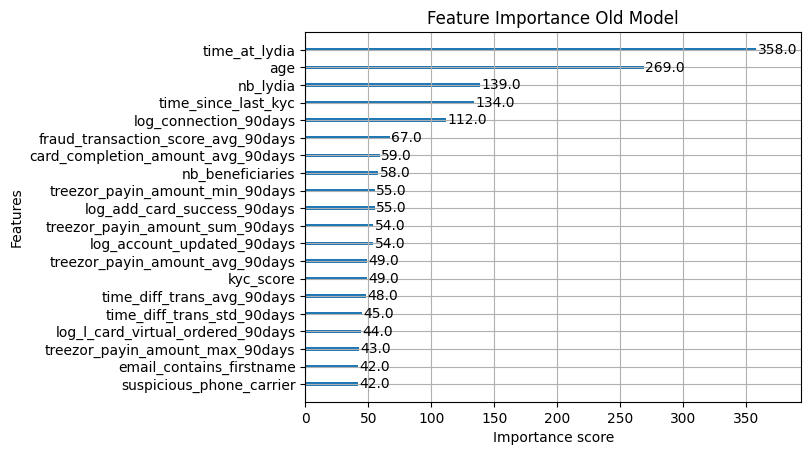

In [16]:
xgb.plot_importance(old_model, max_num_features=20, title="Feature Importance Old Model")
plt.show()

### New Model Training and Evaluation

In [17]:
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train, y_train)

y_train_pred = xg_reg.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
print("Train F1 score:", train_f1)

Train F1 score: 0.9594453711426189


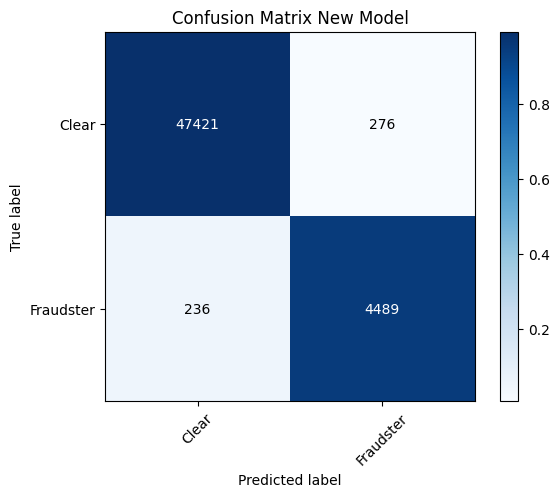

F1 score: 0.9460484720758693


In [32]:
y_pred = xg_reg.predict(X_test)

y_test_labels = [class_labels[x] for x in y_test]
y_pred_labels = [class_labels[x] for x in y_pred]

# Compute confusion matrices
cm_counts = confusion_matrix(y_test_labels, y_pred_labels, labels=list(class_labels.values()))
cm_normalized = confusion_matrix(y_test_labels, y_pred_labels, labels=list(class_labels.values()), normalize='true')

# Plot with normalized colors but show counts
fig, ax = plt.subplots()
im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

# Add raw counts as text, with color based on background
thresh = cm_normalized.max() / 2.
for i in range(cm_counts.shape[0]):
    for j in range(cm_counts.shape[1]):
        color = "white" if cm_normalized[i, j] > thresh else "black"
        ax.text(j, i, cm_counts[i, j], ha="center", va="center", color=color)

ax.set_xticks(range(2))
ax.set_yticks(range(2))
ax.set_xticklabels(list(class_labels.values()), rotation=45)
ax.set_yticklabels(list(class_labels.values()))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix New Model")
plt.colorbar(im)
plt.show()

test_f1 = f1_score(y_test, y_pred)
print("F1 score:", test_f1)

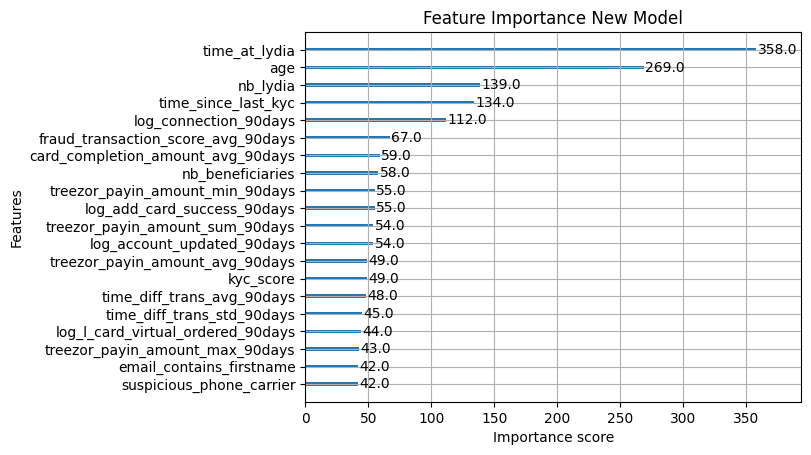

In [31]:
xgb.plot_importance(old_model, max_num_features=20, title="Feature Importance New Model")
plt.show()